In [6]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

In [7]:
from collections import Counter
len(Counter(train_Y).keys())

10

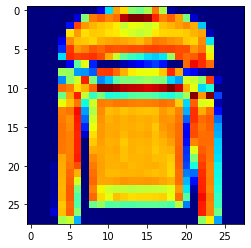

In [8]:
import matplotlib.pyplot as plt
plt.imshow(train_X[5], cmap='jet')

# Preprocessing Data
Preprocessing data perlu dilakukan sebelum membuat neural networks supaya data sesuai dengan format input dan output neural net.

In [9]:
train_label = tf.keras.utils.to_categorical(train_Y, num_classes=10)
test_label = tf.keras.utils.to_categorical(test_Y, num_classes=10)

train_input = tf.data.Dataset.from_tensor_slices((train_X, train_label)).batch(100) # 100 samples diklasifikasi menjadi satu group
test_input = tf.data.Dataset.from_tensor_slices((test_X, test_label)).batch(100)

## Membuat neural net

In [10]:
input_data = tf.keras.layers.Input(shape=(28, 28))
dense = tf.keras.layers.Flatten()(input_data)

dense = tf.keras.layers.Dense(100, activation='relu')(dense)
dense = tf.keras.layers.Dense(100, activation='relu')(dense)
dense = tf.keras.layers.Dense(100, activation='relu')(dense)
dense = tf.keras.layers.Dense(100, activation='relu')(dense)

output_data = tf.keras.layers.Dense(10, activation='softmax')(dense)

model = tf.keras.Model(inputs=input_data, outputs=output_data)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 100)               10100     
                                                                 
 dense_8 (Dense)             (None, 100)               10100     
                                                                 
 dense_9 (Dense)             (None, 10)                1010

In [11]:
# train model
model.fit(train_input, epochs=20) # 20x training


Epoch 1/20
600/600 [==============================] - 4s 4ms/step - loss: 1.4097 - accuracy: 0.7385
Epoch 2/20
600/600 [==============================] - 2s 4ms/step - loss: 0.5252 - accuracy: 0.8164
Epoch 3/20
600/600 [==============================] - 2s 4ms/step - loss: 0.4550 - accuracy: 0.8368
Epoch 4/20
600/600 [==============================] - 2s 4ms/step - loss: 0.4213 - accuracy: 0.8479
Epoch 5/20
600/600 [==============================] - 3s 4ms/step - loss: 0.4027 - accuracy: 0.8548
Epoch 6/20
600/600 [==============================] - 2s 4ms/step - loss: 0.3803 - accuracy: 0.8606
Epoch 7/20
600/600 [==============================] - 2s 4ms/step - loss: 0.3689 - accuracy: 0.8659
Epoch 8/20
600/600 [==============================] - 2s 4ms/step - loss: 0.3570 - accuracy: 0.8693
Epoch 9/20
600/600 [==============================] - 2s 4ms/step - loss: 0.3485 - accuracy: 0.8724
Epoch 10/20
600/600 [==============================] - 2s 4ms/step - loss: 0.3395 - accuracy: 0.8756

# Membuat CNN

In [13]:
train_data = tf.expand_dims(train_X, axis=-1)
test_data = tf.expand_dims(test_X, axis=-1)

# stitching & small-batch processing
train_input = tf.data.Dataset.from_tensor_slices((train_data, train_label)).batch(100)
test_input = tf.data.Dataset.from_tensor_slices((test_data, test_label)).batch(100)

# input layer
# CNN input membutuhkan multidimensional channel warna untuk menampilkan image
# jika tdk ada dimensi yang ditambahkan, maka akan error

input_data = tf.keras.layers.Input(shape=(28, 28, 1))

# convolutional layer
conv = tf.keras.layers.Conv2D(30, 5, padding='SAME', activation='relu')(input_data)
conv = tf.keras.layers.Conv2D(30, 5, padding='SAME', activation='relu')(conv)

# pooling layer
conv = tf.keras.layers.MaxPool2D(pool_size=(2, 2))(conv)
conv = tf.keras.layers.Conv2D(30, 5, padding='SAME', activation='relu')(conv)

# buat fully-connected layer
dense = tf.keras.layers.Flatten()(conv)
output_data = tf.keras.layers.Dense(10, activation='softmax')(dense)

model = tf.keras.Model(inputs=input_data, outputs=output_data)
model.compile(optimizer=tf.optimizers.Adam(0.001), loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 28, 28, 30)        780       
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 30)        22530     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 30)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 30)        22530     
                                                                 
 flatten_3 (Flatten)         (None, 5880)              0         
                                                           

In [14]:
# train and test model
model.fit(train_input, epochs=1)
model.evaluate(test_input)


100/100 [==============================] - 10s 102ms/step - loss: 0.3551 - accuracy: 0.8717


[0.3550531268119812, 0.8716999888420105]

In [ ]:
model.save('./model.h5')

In [ ]:
modelx = tf.keras.models.load_model('./model.h5')
modelx.evaluate(test_input)